(12294, 7)
Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')
(7813737, 3)
Index(['user_id', 'anime_id', 'rating'], dtype='object')
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


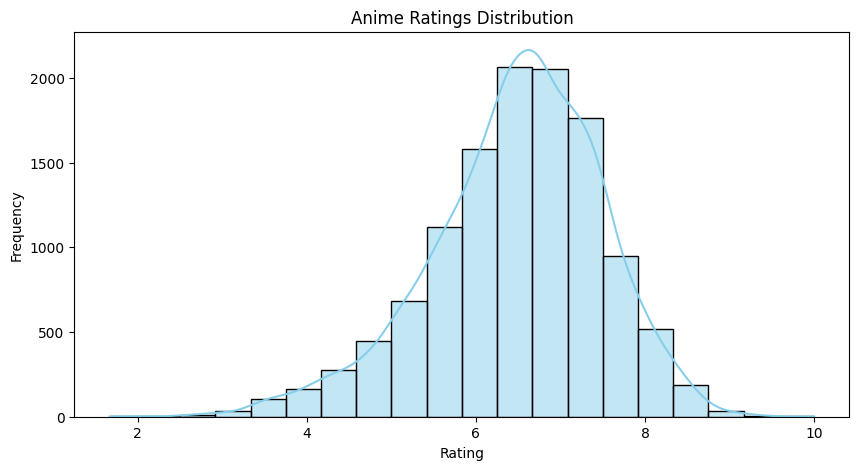

                                          name   type  rating
10464  Taka no Tsume 8: Yoshida-kun no X-Files  Movie   10.00
10400              Spoon-hime no Swing Kitchen     TV    9.60
9595                          Mogura no Motoro  Movie    9.50
0                               Kimi no Na wa.  Movie    9.37
9078                              Kahei no Umi  Movie    9.33
1             Fullmetal Alchemist: Brotherhood     TV    9.26
10786          Yakusoku: Africa Mizu to Midori    OVA    9.25
2                                     Gintama°     TV    9.25
3                                  Steins;Gate     TV    9.17
4                                Gintama&#039;     TV    9.16
                                 name type  rating
1    Fullmetal Alchemist: Brotherhood   TV    9.26
19    Code Geass: Hangyaku no Lelouch   TV    8.83
40                         Death Note   TV    8.71
86                 Shingeki no Kyojin   TV    8.54
131                         Toradora!   TV    8.45
159         

C:\Users\bhara\AppData\Local\Temp\ipykernel_23396\3762508082.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values,y=top_genres.index,palette='mako')


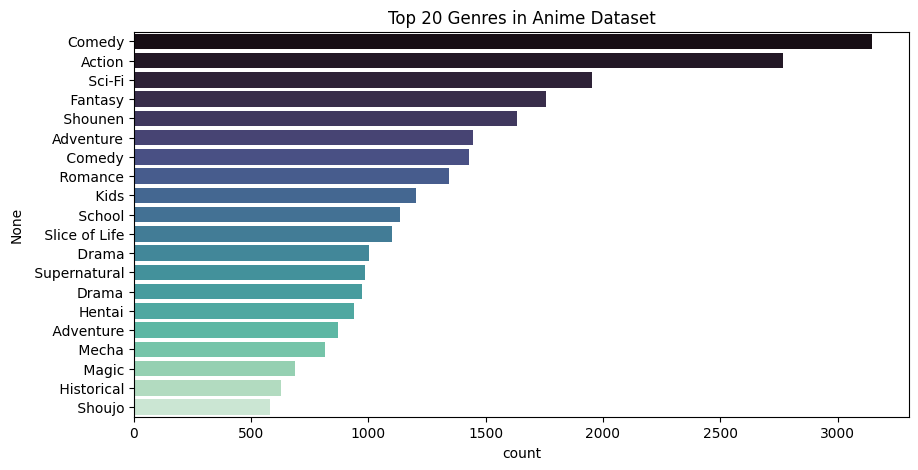

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

anime = pd.read_csv('../data/raw/anime.csv')
ratings = pd.read_csv('../data/raw/rating.csv')

print(anime.shape)
print(anime.columns)
print(ratings.shape)
print(ratings.columns)

print(anime.isnull().sum())

#clean Drop  rows 
anime.dropna(inplace=True)
merged_df = pd.merge(ratings,anime,on='anime_id')

plt.figure(figsize=(10,5))
sns.histplot(anime['rating'],bins=20,kde=True,color='skyblue')
plt.title("Anime Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

#top rated Anime 
top_rated = anime.sort_values(by='rating',ascending=False).head(10)
print(top_rated[['name','type','rating']])

#most rated Anime
most_rated_ids = ratings['anime_id'].value_counts().head(10)
most_rated = anime[anime['anime_id'].isin(most_rated_ids.index)]
print(most_rated[['name','type','rating']])

#Genre Frequency
from collections import Counter

genres = anime['genre'].dropna().str.split(',')
flat_genres = [g for sublist in genres for g in sublist]
top_genres = pd.Series(flat_genres).value_counts().head(20)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values,y=top_genres.index,palette='mako')
plt.title("Top 20 Genres in Anime Dataset")
plt.xlabel("count")
plt.show()